In [151]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

#### Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.


In [152]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0, parse_dates=[0])

#### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [153]:
df = df.loc[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

#### Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

In [154]:
x_labels = df.index.tolist()
start_date = df.index[0].strftime("%m/%Y")
end_date = df.index[-1].strftime("%m/%Y")

(<Figure size 1800x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Year-wise Box Plot (Trend)'}, xlabel='Year', ylabel='Page Views'>,
        <AxesSubplot:title={'center':'Month-wise Box Plot (Seasonality)'}, xlabel='Month', ylabel='Page Views'>],
       dtype=object))

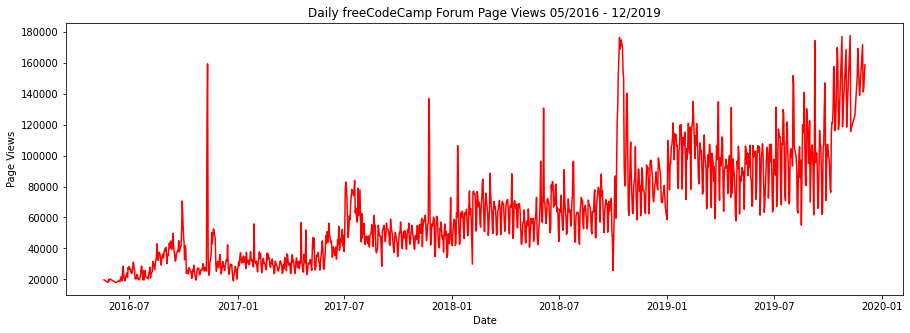

In [155]:
fif, ax1 = plt.subplots(figsize=(15, 5))

plt.plot(df.index, df["value"], color="red")

ax1.set_ylabel('Page Views')
ax1.set_xlabel('Date')
ax1.set_title("Daily freeCodeCamp Forum Page Views {} - {}".format(start_date, end_date))

plot_objects

#### Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [156]:
df_fig_2 = df.groupby(pd.Grouper(freq='M')).mean()
df_fig_2['YEAR'] = df_fig_2.index.strftime("%Y")
df_fig_2['MONTH'] = df_fig_2.index.strftime("%B")
months_sorted =[datetime.date(2000, m, 1).strftime('%B') for m in range(1, 13)]

(<Figure size 1800x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Year-wise Box Plot (Trend)'}, xlabel='Year', ylabel='Page Views'>,
        <AxesSubplot:title={'center':'Month-wise Box Plot (Seasonality)'}, xlabel='Month', ylabel='Page Views'>],
       dtype=object))

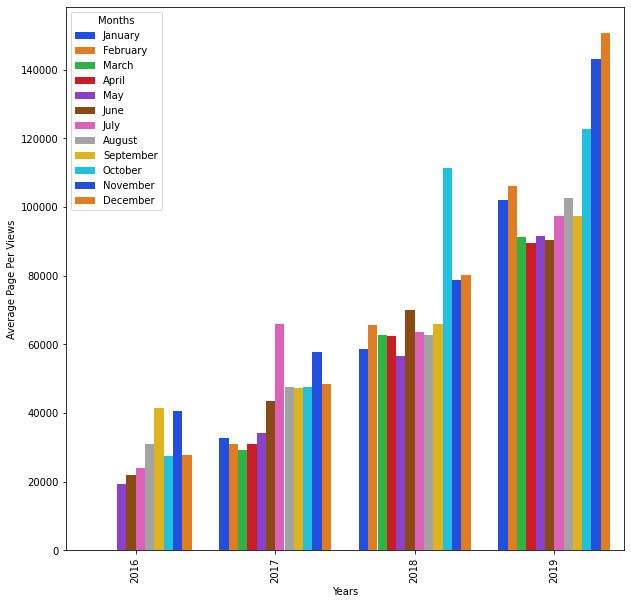

In [157]:
fif, ax1 = plt.subplots(figsize=(10, 10))
sns.barplot(x="YEAR", y="value", hue="MONTH",
            data=df_fig_2, palette="bright", hue_order=months_sorted)

ax1.legend(loc='upper left', title='Months')
ax1.set_ylabel('Average Page Per Views')
ax1.set_xlabel('Years')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plot_objects

#### Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [158]:
df_fig_3 = df.copy()
df_fig_3['year'] = df_fig_3.index.strftime("%Y")
df_fig_3['month'] = df_fig_3.index.strftime("%b")
months_sorted =[datetime.date(2000, m, 1).strftime('%b') for m in range(1, 13)]

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

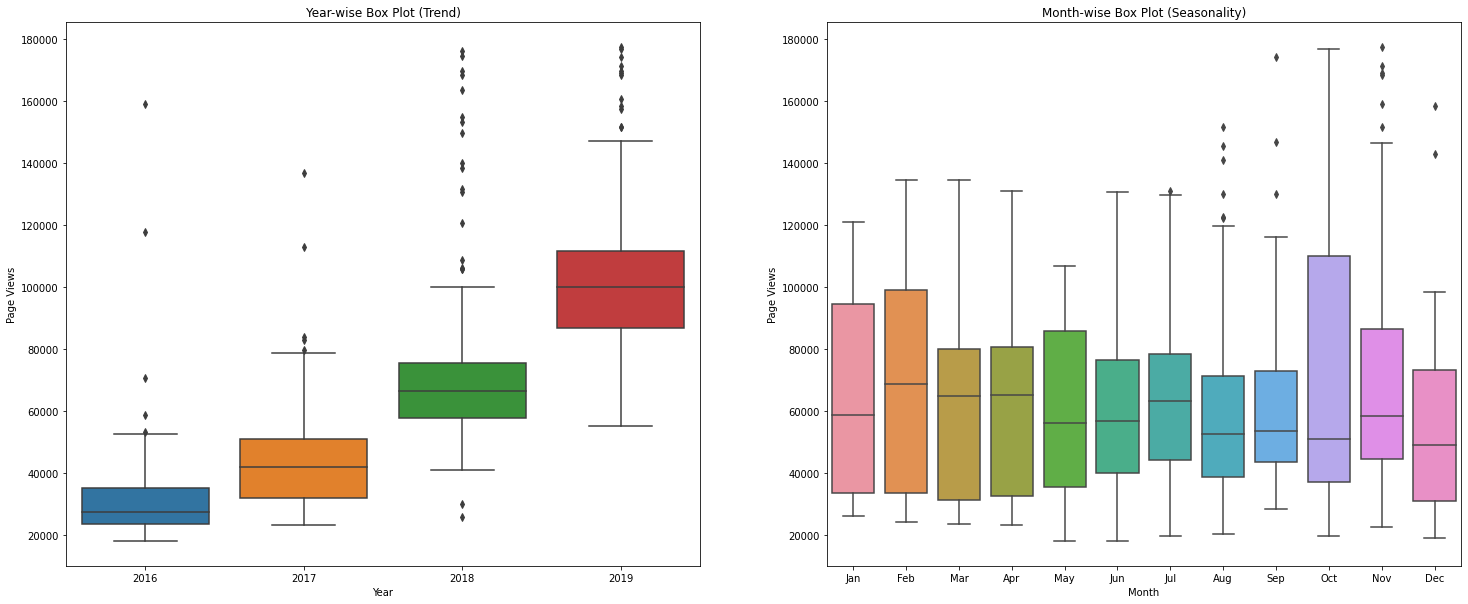

In [159]:
plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

fig, ((ax1, ax2)) = plot_objects
sns.boxplot(x="year", y="value", data=df_fig_3, ax=ax1)
sns.boxplot(x="month", y="value", data=df_fig_3, ax=ax2, order=months_sorted)

ax1.set_ylabel('Page Views')
ax1.set_xlabel('Year')

ax2.set_ylabel('Page Views')
ax2.set_xlabel('Month')

ax1.set_title("Year-wise Box Plot (Trend)")
ax2.set_title("Month-wise Box Plot (Seasonality)")